# Machine Learning - Practical 2 - Introduction to Pytorch and Linear Regression with Pytorch

Names: {Vinzenz Brehme, Dennis Exter, Miriam Reichlmaier}  
Summer Term 2024   

# IMPORTANT SUBMISSION INSTRUCTIONS

You should work on the exercises in groups of 2-3. It is on you how you collaborate, but please make sure that everyone contributes equally and also that you understand all the solutions.
You will be asked to present your group's solution in the tutorials and you should be well prepared to present any part of it.

- When you've completed the exercise, download the notebook and rename it to ```<surname1>_<surname2>_<surname3>.ipynb```.
- Only submit the Jupyter Notebook (ipynb file). No other file is required. Upload it on `Stud.IP` -> `Machine learning 1` -> `Files` -> `Submission of Homework 1`.
- Make only one submission of the exercise per group.
- The deadline is strict.
- In addition to the submissions, every member of your group should be prepared to present the exercise in the tutorials.

Implementation
- Do not change the cells which are marked as "DO NOT CHANGE", similarly write your solution to the marked cells.

## How to work on the exercise?

Generally, for machine learning you often need access to a machine with a GPU. This is not strictly required for this homework but we recommend using [Kaggle](https://www.kaggle.com/), which offers convenient access to a GPU and has all the dependencies that we need preinstalled ([here](https://gist.github.com/anwai98/444d3ff11c1365f2c610579d5df0830b) are some initial steps to work with Kaggle Notebooks). You can load this notebook on kaggle via `File` -> `Import Noteboook` -> `Browse and  Import`. Alternatively, you can also use [Colab](https://colab.research.google.com).

# Introduction

In this task you will get to know the basic tools used by the machine learning community.
Later, we will build a linear regression model with PyTorch and perform training and prediction the linear regression problem from the previous practical. The goal of this tutorial is to understand the PyTorch framework and getting to know to use it. 

## Tutorials

Some python libraries are required to accomplish the tasks assigned in this homework. If you feel like you need to follow a tutorial before, feel free to do so:

*   [PyTorch Tutorial](https://pytorch.org/tutorials/)
*   [Seaborn Tutorial](https://seaborn.pydata.org/tutorial.html) (data visualization library on top of matplotlib)


In [1]:
import random
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import pathlib
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from torch.utils.data import sampler

In [2]:
torch.set_default_dtype(torch.float64)

## System checks

Perform some rudimentary system checks. Do we have a CUDA-capable device? Multiple? Is CuDNN active (huge speedups for some networks)?

In [3]:
torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count()

(False, True, 0)

If you see now that now that there is no CUDA-capable device available, you have to activate the GPU.

Click the top-right corner menu `|<` -> `Settings` -> `Accelerator` -> Select `GPU` as Hardware accelerator.

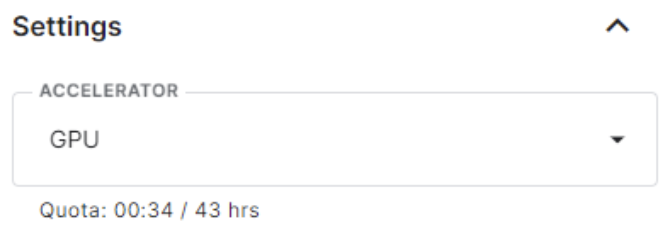

Now check the availability again (after re-running the imports)

In [4]:
#torch.cuda.is_available(), torch.backends.cudnn.is_available(), torch.cuda.device_count(), torch.cuda.current_device()

Choose your device for computation. CPU or one of your CUDA devices?

In [5]:
# DO NOT CHANGE
use_cuda = True
#use_cuda = False
use_cuda = False if not use_cuda else torch.cuda.is_available()
device = torch.device('cuda:0' if use_cuda else 'cpu')
torch.cuda.get_device_name(device) if use_cuda else 'cpu'
print('Using device', device)

Using device cpu


# PyTorch: Getting to know Tensors

*feel free to skip this before 'Machine Learning with Pytorch' section if you feel confident enough*   
PyTorch is a library for machine learning on arbitrary datasets, including irregular input data such as graphs, point clouds and manifolds.

In this short tutorial we will explore some of its features to handle data in tensors.
If you want, you can look into more [detailed PyTorch tutorials](https://pytorch.org/tutorials/) online.

In [6]:
# create a numpy array
numpyarray = np.arange(10).reshape(2, 5)
# convert to pytorch tensor
a = torch.from_numpy(numpyarray)

Let us find out what the properties of this tensor 'a' are.

In [7]:
# TODO print the tensor
print(a)

tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])


In [8]:
# TODO print its type
print(a.type())

torch.LongTensor


In [9]:
# TODO print its shape
print(a.shape)

torch.Size([2, 5])


In [10]:
# TODO print its size
print(a.size())

torch.Size([2, 5])


In [11]:
# TODO create a new numpy array out of the tensor and print its size
a_arr = a.numpy()
print(a_arr.size)

10


Let's create some new tensors.

In [12]:
# TODO create a tensor of shape (2,5) filled with ones of type int and print it
t1 = torch.ones_like(a)
print(t1)

tensor([[1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1]])


In [13]:
# TODO create a tensor of shape (3,4) filled with zeros and print it
t0 = torch.zeros(3,4)
print(t0)

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])


In [14]:
# TODO transpose the tensor 'a'
print(f"Tensor = {a}")
a_transposed = a.T
print()
print(f"Transposed Tensor = {a_transposed}")

Tensor = tensor([[0, 1, 2, 3, 4],
        [5, 6, 7, 8, 9]])

Transposed Tensor = tensor([[0, 5],
        [1, 6],
        [2, 7],
        [3, 8],
        [4, 9]])


Now change a value in the numpy array. Does the corresponding tensor change?

In [15]:
# TODO change value in numpy array and inspect the tensor a
print(f"array before changes = {a_arr}")
print()
a_arr[0][1] = 2
print(f"array after change = {a_arr}")
print()
print(f"Tensor values = {a}")
print()
print()
print()
# Other way around 
print(f"Tensor values before change = {a}")
a[0][1] = 3
print()
print(f"Tensor values after change = {a}")
print()
print(f"array values = {a_arr}")

array before changes = [[0 1 2 3 4]
 [5 6 7 8 9]]

array after change = [[0 2 2 3 4]
 [5 6 7 8 9]]

Tensor values = tensor([[0, 2, 2, 3, 4],
        [5, 6, 7, 8, 9]])



Tensor values before change = tensor([[0, 2, 2, 3, 4],
        [5, 6, 7, 8, 9]])

Tensor values after change = tensor([[0, 3, 2, 3, 4],
        [5, 6, 7, 8, 9]])

array values = [[0 3 2 3 4]
 [5 6 7 8 9]]


Yes, it changes

Does it work the other way round as well?

Yes, it changes in both ways

Now we want to make use of the different devices available, namely cpu and gpu.

In [16]:
# TODO move 'a' to the gpu
a.to(device)

tensor([[0, 3, 2, 3, 4],
        [5, 6, 7, 8, 9]])

If you change a value in the tensor 'a' now, does the corresponding value in the tensor on the GPU change as well?

No the values does not change

# Machine Learning with Pytorch

The process of training and evaluating a machine learning model begins with **data loading**.
A dataset needs to be chosen on which the model should be trained.
This data might need some preprocessing (like resizing or normalizing) of images. As Pytorch does not have in-build preprocessing for data panels we have to define our custom normalization inside a Dataset or Dataloader.
Splitting of the data in different sets is necessary. We need a set to train on, a set to validate the training progress and a set to test the model after training.

The next step is to **specify the model and its optimizer**, as well as the loss function.
An important hyperparameter is the learning rate which influences how big the changes of the parameters should be after calculating the loss.

The **model fitting** is split into training and evaluation.
In the training process the model does a forward pass which means the data is presented to the model and the model outputs a prediction.
The loss compares the prediction with the ground truth.
In the backward pass the gradient with regard to the parameter is calculated and the parameter are updated by the gradient step.
In the evaluation process the loss is computed on the entire validation set.
This is done to see how well the model operates on data for which the params were not optimized before in order to avoid overfitting.
The model fitting process is repeated for `N` epochs which is another hyperparameter that needs to be chosen carefully.

After the training we evaluate the final model on the test set.

We'll go through the individual steps in the course of this notebook using linear regression as an example.


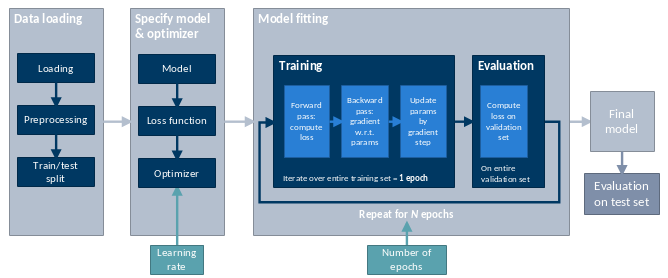

## Data Loading and Preprocessing

### Training, Validation and Test Sets

For the correct fitting of a neural network model we need three dataset components: one for training, one for validation in the training process, and the last one for testing the results of the training on unseen data.

Note that you should not use the test set in any part of your training and model selection procedure. It should be only used for showing the final results.  

Usually, train and test datasets are already split in the provided kaggle datasets but as we work with a custom dataset, we would have to make train-test split ourselves first.

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
test_size = 0.2
target_clm='critical_temp'

In [19]:
# TODO: load data - same as in the previous practical and make train_test_split from sklearn
# Using kaggle
# path = "/kaggle/input/superconduct-train/superconduct_train.csv"
# Using directories
path = "data/superconduct_train.csv"

df = pd.read_csv(path)
X = df
y = df['critical_temp']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,  test_size=test_size, shuffle=True)
train, test = X_train, X_test

### Dataset

PyTorch has 2 entities to load data. They are **Dataset** and **Dataloader**.
**Dataset** is a class, which defines your data and often applies data preprocessing transformations, like normalization. It should have at least 3 functions :
* __init__ - as any other init. Usually, you would provide path to dataset here or dataset elements.
* __len__ - should return the whole dataset size
* __getitem__ - this function returns 1 pair of data and label, also here preprocessing transformations are usually applied



For the next exercise, take a look here for an example https://stanford.edu/~shervine/blog/pytorch-how-to-generate-data-parallel

In [20]:
class Dataset(torch.utils.data.Dataset):
    def __init__(self, df, target_clm, mean=None, std=None, normalise=True):
        '''
        TODO: save params to self attributes,
        x is data without target column
        y is target column
        transform df to_numpy
        '''
        numpy_y = df[target_clm].to_numpy()
        numpy_x = df.drop(target_clm, axis=1).to_numpy()
        #self.target_column=target_clm
        self.x = numpy_x
        self.y = numpy_y
        self.mean = mean
        self.std = std
        self.normalise = normalise
        
    def __len__(self):
        # TODO: return whole dataset length
        return len(self.x)

    def __getitem__(self, index):
        data = self.x[index]
        if self.normalise and self.mean is not None and self.std is not None:
            data = (data - self.mean) / self.std
        return data, self.y[index]

In [21]:
tmp_dataset = Dataset(train, target_clm, normalise=False)

In [22]:
# TODO calculate the mean and standard deviation of the train dataset
mean = np.mean(tmp_dataset.x)
print('Mean:  '+ str(mean))
std = np.std(tmp_dataset.x)
print('Std: ' + str(std))

Mean:  540.5507131942188
Std: 1753.9690308748075


In [23]:
# TODO define new datasets with mean, std and normalise=True
conductor_train = Dataset(train, target_clm, mean, std, normalise=True)
conductor_test  = Dataset(test , target_clm, mean, std, normalise=True)

We need to **split** the train dataset in two sets, one for training and one for validation.
While the training set needs to be quite large, the validation set can be relatively small.
Take 10 % of the dataset as validation set.
Assign samples *randomly* to the training and validation set, using a fixed seed to ensure that train and test splits are same across different model runs.

In fact, the good practice is to fix a global random seed not only the generator seed for even better reproducibility with `torch.manual_seed(0)`.
Machine learning models often involve random initialization of weights, augmentations, dropout layers, and other stochastic processes. Without fixing the random seed, each run of the model may produce slightly different results, making it challenging to reproduce specific results or debug issues.

In [24]:
from torch.utils.data import random_split
# TODO split the train dataset in conductor_train and conductor_val
torch.manual_seed(0)
generator = torch.Generator()

val_length = 0.1
train_length = 1 - val_length # 0.9

conductor_train, conductor_val = random_split(dataset=conductor_train, # split the train dataset in two sets with 
                                              lengths=[train_length, val_length],  # 90% for train and 10% for validation
                                              generator=generator)

In [25]:
batch_size = 256

To load the data for model training, we need to define the **dataloaders**.
A dataloader represents a Python iterable over a dataset and draws mini batches with random samples.
**Dataloader** calls \_\_getitem__ function from the Dataset and forms the batches.


Use the batch size as specified above.
Make sure we get shuffled samples in batches.

In [26]:
# TODO create dataloader for training, validation and test
train_dataloader = DataLoader(conductor_train, batch_size, shuffle=True)
val_dataloader   = DataLoader(conductor_val  , batch_size, shuffle=True)
test_dataloader  = DataLoader(conductor_test , batch_size, shuffle=True)

Let's get a data point now to see what we're dealing with.

For this, you might want to check out how python's iterator protocol works. It's simple and will give you an important insight into python: https://wiki.python.org/moin/Iterator.

In [27]:
# TODO get an element of the train_dataloader
x_batch, y_batch = next(iter(train_dataloader))

In [28]:
# TODO print the dimensions of for elements from the previous step
print(x_batch.shape)
print(y_batch.shape)

#print(element_arr.shape)

torch.Size([256, 81])
torch.Size([256])


x has size (\[batchsize\], 81) --> 256 elements/batches (or whatever you have defined in your data loader), 81 feature values.

y has size (\[batchsize\], 1) --> 256 elements/batches (again depends on your data loader config). There's one target value for each set of the features.

## Specify Model & Optimizer

### Specify a Model

The task is now to define a model to train on the data. In this simple example, we only need **one fully-connected layer** as defined in *torch.nn.Linear* that produces a predicted label for a specific training input row.

Before, we set some variables:
- the input and output size of the linear layer
- how long we want to train the model (number of epochs) and
- the learning rate.


In [29]:
epochs = 1
input_dim = 81
output_dim = 1
lr = 0.001

In [30]:
class LinearRegression(torch.nn.Module):
    """
    Linear regression model inherits the torch.nn.Module
    which is the base class for all neural network modules.
    """
    def __init__(self, input_dim, output_dim):
        """ Initializes internal Module state. """
        super(LinearRegression, self).__init__()
        # TODO define linear layer for the model
        self.linear = torch.nn.Linear(input_dim, output_dim)


    def forward(self, x):
        """ Defines the computation performed at every call. """
        # What are the dimensions of your input layer?
        # TODO flatten the input to a suitable size for the initial layer
        x = x.reshape(-1, 81)
        # TODO run the data through the layer
        outputs = self.linear(x)
        return outputs

### Instantiate the Model

Let us instantiate the model and take a look at the inside. It is always a good idea to verify that the actual architecture is what you intended it to be. Especially, when you start to create layers dynamically it is great for inspection/verification/debugging.

In [31]:
# TODO instantiate the model
model = LinearRegression(input_dim, output_dim)

Feed the model to the GPU if available.

In [32]:
# TODO move model to device you specified above
model.to(device)

LinearRegression(
  (linear): Linear(in_features=81, out_features=1, bias=True)
)

Put the model in training mode.

In [33]:
# TODO put the model in train mode
model.train()

LinearRegression(
  (linear): Linear(in_features=81, out_features=1, bias=True)
)

### Define a Loss Function

Since we're dealing with regression problem, [MSELoss](https://pytorch.org/docs/stable/generated/torch.nn.MSELoss.html) is the canonical choice for the loss.

In [34]:
# TODO define the loss function
loss_function = torch.nn.MSELoss()

## Model Fitting

### Train the Model

Everything is set for the model to train!

- In the forward pass, the prediction is made using the previously defined model on the elements of the dataloader.
- Then the loss (or error) needs to be computed by comparing the prediction to the actual label.
- In the backward pass, the model learns and updates its weights based on the current gradient.

### First, let's do all of the steps manually, without using the optimizer

**Hints:**
* define number of epochs to see the dynamic. You need to see the effect over several epochs but it should no be too long. 
* use learning rate defined above as `lr`
* when doing parameters update - do it under `with torch.no_grad():`. This would disable the gradient computation for the operations under it. And we don't need gradients for updating the weights step.
* you need to update the model parameters. See [here](https://pytorch.org/tutorials/beginner/introyt/modelsyt_tutorial.html) for more details on how to access them
* don't forget to track the learning (loss)

In [35]:
## TODO do a simple for-loop to illustrate how the gradient update if done over batches. 
## Print loss values across epochs to compare with the PyTorch optimizers later

epochs = 11
losses = []

for epoch in range(epochs):
    epoch_loss = 0.0
    
    for x_batch, target in train_dataloader:
        
        # auf gpu ausführen
        x_batch = x_batch.to(device)
        # unsqueeze, da wir ein [256, 1] array bei target als shape haben
        target = target.unsqueeze(1).to(device)
        # gradienten auf null setzen und loss berechnen
        pred = model(x_batch)
        loss = loss_function(pred, target)
        #print(f"item = {loss.item()}")
        epoch_loss += loss.item()
        loss.backward()
        
        # parameter aktualisieren
        with torch.no_grad():
            for param in model.parameters():
                param -= lr * param.grad
        
        model.zero_grad()

        
    mean_loss = epoch_loss/len(train_dataloader)
    print(f"Epoch loss for epoch {epoch} = {mean_loss}")
    losses.append(epoch_loss)


Epoch loss for epoch 0 = 1200.6990532517627
Epoch loss for epoch 1 = 930.8809237074508
Epoch loss for epoch 2 = 890.9379081201827
Epoch loss for epoch 3 = 864.7862529230168
Epoch loss for epoch 4 = 843.2686518066447
Epoch loss for epoch 5 = 827.0256380914249
Epoch loss for epoch 6 = 812.2454158596294
Epoch loss for epoch 7 = 801.5966065372434
Epoch loss for epoch 8 = 791.9677063734431
Epoch loss for epoch 9 = 783.9257150256416
Epoch loss for epoch 10 = 777.6913144229399


This was equivalent to SGD optimizer

### Now let's do it in the pytorch style using the optimizer  

The optimizer is the learning algorithm we use. In this case, we use Stochastic Gradient Descent (SGD).
Redefine the model and initialize SGD optimizer

In [36]:
# TODO Redefine the model and initialize SGD optimizer, write a train loop as above and compare the loss values
# Modell, Optimierer und Verlustfunktion initialisieren
import torch.optim as optim
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)

epochs = 11
losses = []

for epoch in range(epochs):
    epoch_loss = 0.0

    # das gleiche wie oben, nur mit optimizer statt manuell 
    for x_batch, target in train_dataloader:
        x_batch = x_batch.to(device)
        target = target.unsqueeze(1).to(device)
        optimizer.zero_grad()
        pred = model(x_batch)
        loss = loss_function(pred, target)
        #print(f"item = {loss.item()}")
        epoch_loss += loss.item()
        loss.backward()
        # step führt die parameterberechnung durch
        optimizer.step()
    
    epoch_loss /= len(train_dataloader)
    print(f"Epoch loss for epoch {epoch} = {epoch_loss}")
    losses.append(epoch_loss)

Epoch loss for epoch 0 = 762.2495574737242
Epoch loss for epoch 1 = 739.8976894303788
Epoch loss for epoch 2 = 730.7365968729409
Epoch loss for epoch 3 = 718.3855026502389
Epoch loss for epoch 4 = 710.3068872584008
Epoch loss for epoch 5 = 705.586603501023
Epoch loss for epoch 6 = 699.0067407845885
Epoch loss for epoch 7 = 694.149452029294
Epoch loss for epoch 8 = 691.9053523083746
Epoch loss for epoch 9 = 686.4865869266033
Epoch loss for epoch 10 = 684.2922710195967


### Make a Prediction

Now that our model is trained, we can make a new prediction by inputting an unseen data row from the test dataset.

Run this cell several times, does the model predict accurately?

Set the number of epochs to 15 during training and try again!

**TODO your answer here** -

In [37]:
# TODO get a random element of the test dataloader
x_batch, y_batch = next(iter(test_dataloader))
# TODO make a prediction
x_batch = x_batch.to(device)
y_batch = y_batch.to(device)
pred = model(x_batch)

# print predicted label and given label
print(f"given label = {y_batch}")
print()
print()
print(f"predicted label = {pred}")

given label = tensor([8.1200e+01, 9.3000e+01, 7.3000e+01, 1.1600e+02, 2.2000e+01, 8.4000e+00,
        2.3000e-01, 1.5000e+00, 1.6000e+01, 6.5000e+01, 2.1300e+01, 5.1900e+00,
        3.2900e+01, 3.7430e+01, 8.8000e+01, 3.3980e+01, 1.8200e+00, 1.5100e+01,
        8.5000e+00, 1.9700e+01, 8.9100e+01, 1.8400e+01, 9.0900e+01, 6.3000e+00,
        8.2000e+01, 8.6000e+01, 8.0500e+00, 1.2500e+02, 1.2100e+01, 4.1000e+01,
        7.5000e+01, 1.3800e+01, 3.5100e+00, 5.3000e+01, 1.5500e+01, 7.5000e+01,
        1.5200e+01, 1.6000e+01, 2.1500e+01, 5.0000e+01, 5.4000e+01, 1.3900e+01,
        4.0000e+00, 1.2100e+01, 8.7100e+00, 3.8000e+00, 4.9400e+01, 3.1000e+00,
        1.3600e+01, 6.3000e+00, 8.3200e+00, 6.6500e+00, 7.3000e+01, 6.0100e+00,
        2.0300e+01, 1.4900e+00, 9.3000e+01, 4.9000e+00, 4.0000e+01, 2.3000e+00,
        1.6530e+00, 7.2400e+01, 2.9500e+00, 6.8000e-01, 5.3100e+00, 7.8000e+00,
        8.0000e+01, 9.3000e+00, 7.8500e+01, 2.3000e+01, 3.6800e+01, 9.0800e+01,
        6.6500e+01, 2.6700

### Track and Plot the Training and Validation error

What we have seen so far is the basic principle of training a model and making a prediction. But one might be interesting to see more about the training process, for instance how the training error evolves with time.

For this step, we are going to **refine the training process** and **add some important information saving for plotting**.

Create a plot using **seaborn** that contains both the losses on training set and the losses on the validation set for each epoch.

The plot should look similar to this:


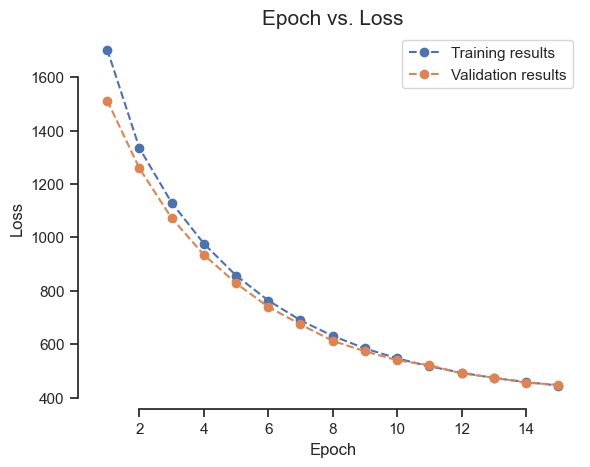


**Note:** Do not forget to add title, axis labels and a legend!
This applies in general, please keep in mind for future exercise sheets.

In [38]:
# TODO refine the training function from above
# it should contain:
# - saving of losses
# - returning the mean loss
optimizer = optim.SGD(model.parameters(), lr=lr, momentum=0.9)
#optimizer = optim.SGD(model.parameters(), lr=lr)
# wie oben auch schon in der sgd abteilung
def train(train_dataloader, lr):
    losses = []
    for x_batch, target in train_dataloader:
        x_batch = x_batch.to(device)
        target = target.unsqueeze(1).to(device)
        pred = model(x_batch)
        loss = loss_function(pred, target)
        losses.append(loss.item())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
    mean_loss = sum(losses)/len(train_dataloader)
    return mean_loss

In [39]:
# TODO write a validation function that calculates the loss on the validation set
# you can also combine it with the training function

# validation set wird trainiert und der loss berechnet
def validate(val_dataloader, lr):
    validation_loss = train(val_dataloader, lr)
    return validation_loss

In [40]:
# TODO write a run_training function that
# - calls the train and validate functions for each epoch
# - saves the train_losses, val_losses as arrays for each epoch

# für anzahl der epochen und lr values werden trainings runs erzeugt
def run_training(epochs, lr):
    train_losses = []
    val_losses = []
    for i in range(epochs):
        train_loss = train(train_dataloader, lr)
        val_loss = validate(val_dataloader, lr)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
    return train_losses, val_losses


In [41]:
# TODO call the run_training function and run it for 10 epochs.

# 15 trainingsruns werden mit einem lr value berechnet
num_epochs = 15
train_losses, val_losses = run_training(num_epochs, lr)

In [42]:
# TODO write a plot function

# ein plot mit trainings daten und ein plot mit validation daten wird erstellt
def plot_losses(train_losses, val_losses, epochs):
    epochs_range = range(epochs)
    plt.plot(epochs_range, train_losses, marker="o", color="blue", linestyle="-", label="Train Loss") 
    plt.plot(epochs_range, val_losses, marker="o", color="orange", linestyle="-", label="Validation Loss")
    plt.legend()
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Epoch vs Loss")
    plt.show()

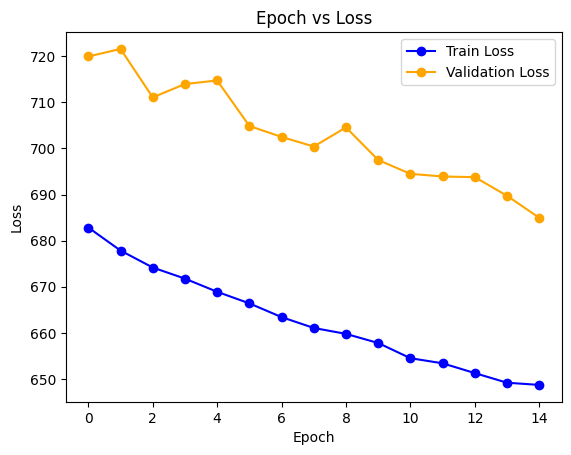

In [43]:
# TODO plot losses
plot_losses(train_losses, val_losses, num_epochs)

Comment on the loss curve. Does it look as expected? Why/Why not?
If not, what might be the reason.

# Hyperparameters influence

Now, once we successfully reproduced linear regression using PyTorch, lets explore the hyperparameters influence, such as learning rate or batch size.

Train several models with 30 train epochs and using different learning rates - [0.0001, 0.001, 0.01, 0.1, 1, 10].
What do you notice? Why?

*Hints*: 
* Do not forget to reinitialize models and update the optimizers
* Use different colors and line styles to display different learning rates and train-validation splits

In [44]:
num_epochs = 30
## TODO - train models with different learning rates

lrs = [0.0001, 0.001, 0.01, 0.1, 1, 10]
losses = []
for lr in lrs:
    model = LinearRegression(input_dim, output_dim)
    model.to(device)
    model.train()
    train_losses, val_losses = run_training(num_epochs, lr)
    loss = [train_losses, val_losses]
    losses.append(loss)

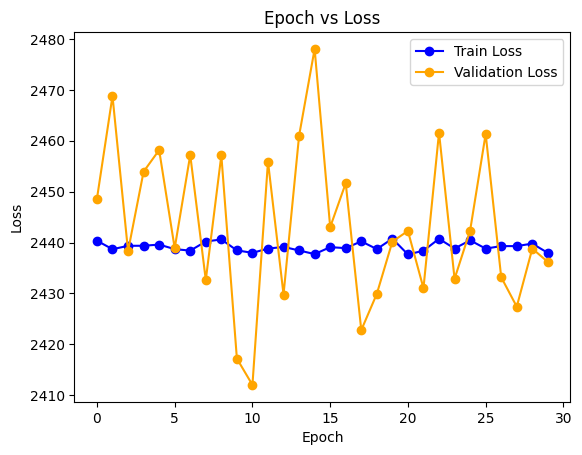

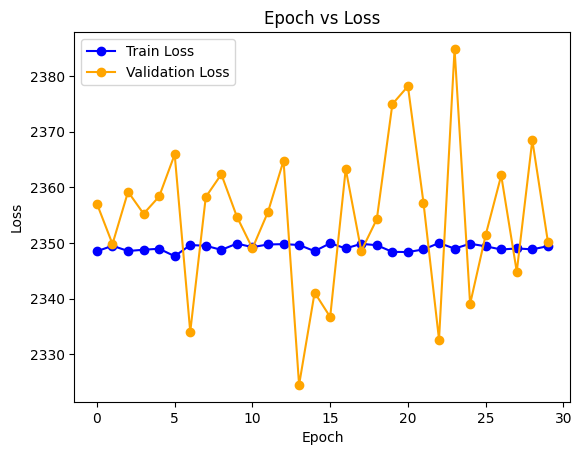

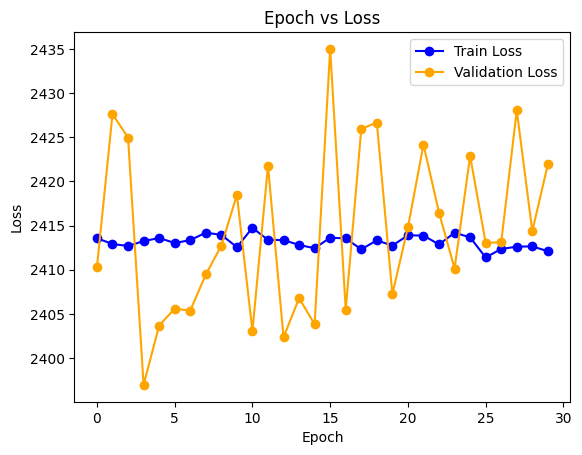

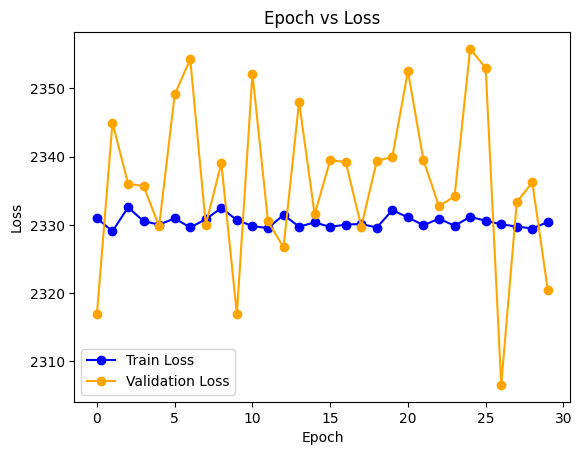

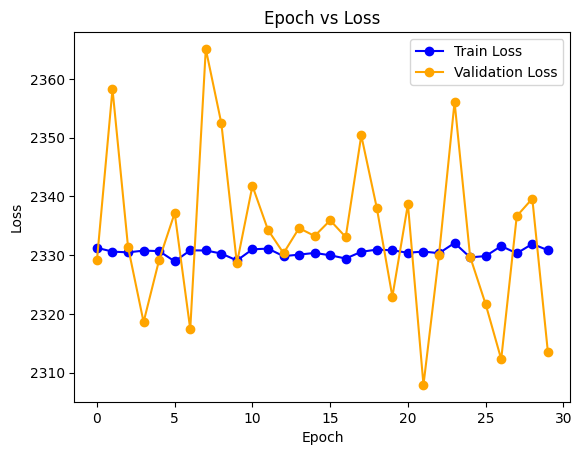

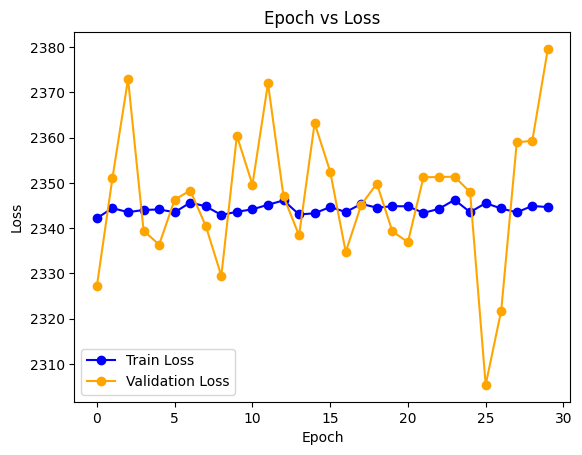

In [45]:
## TODO plot the losses from different models. What do you see and why?
for loss in losses:
    plot_losses(loss[0], loss[1], num_epochs)

## How do we know the amount of epochs and best learning rates?

The honest answer - we just try it out. The heuristics, which are typically used are the following
* use adaptive optimizers. Adam would be a typical example. It is an adaptive learning rate optimization algorithm that is designed to be appropriate for non-stationary objectives and problems with very noisy and/or sparse gradients. More details [here](https://paperswithcode.com/method/adam). This makes the training more robust to the choise of the the learning rate
* Use schedulers for the training. They change the value of the learning rate based on the loss behaviour. The most typical ones are
  * Early stopper . The early stopper is helpful to avoid redundunt computations and overfitting. It basically stops the train loop if the loss function does not decrease on the validation split for some time.
  * Warm up. Warm up slowly increases the learning rate in the begining of the training. This helps to avoid bad influence of not-so-good initialisation and especially helpful for the layers, which need to accumulate statistics, such as BatchNorm. We will use such layers later in the course.

### Task
Modify the the training function with the early stopper logic.
This should stop the training loop if the validation loss function does not improve over $N$ epochs. The improvement is only something, which is better than the $tol$ value, which stays for the tolerance.

Use $tol=2$, $N=5$, $num\_epochs=150$, $lr=0.01$ for the function start.

**Question**:
* Can $tol=0$? Why?  
Yes the tolerance can be set to $0$ but then even the tiniest increase of the validation loss will stop the training. With this we would risk to stop before we reach the optimal amount of epochs.
* How many epochs it would really run? Try to change the $lr=0.001$ and $lr=0.0001$ and see when this would stop.
* What happens if you increase the tolerance?  
If we increase the tolerance the training will go on longer but at the same time we can even out higher increases in the validation loss function.
* What if you increase $N$?  
If we increase $N$ the model will be trained longer for the increase in epochs. Depending on how wide local minimums are this could even out the function or risk a earlier stop in a local minimum if the tolerance is not increased at the same time.

In [46]:
## TODO: adopt the train function with the early stopper logic

def run_training(epochs, lr, tol=2, N=5):
    train_losses = []
    val_losses = []
    for _ in range(epochs):
        train_loss = train(train_dataloader, lr)
        val_loss = validate(val_dataloader, lr)
        train_losses.append(train_loss)
        val_losses.append(val_loss)
        if len(val_losses) > 5:
            #print(f"validation loss difference: {val_losses[len(val_losses)-1 - N] - val_losses[len(val_losses)-1]}")
            if val_losses[len(val_losses)-1 - N] - val_losses[len(val_losses)-1] < tol:
                break
    return train_losses, val_losses

In [47]:
## TODO: Train models with early stopping with the different learning rates

num_epochs = 150

lrs = [0.01, 0.001, 0.0001]
losses = []
for lr in lrs:
    model = LinearRegression(input_dim, output_dim)
    model.to(device)
    model.train()
    train_losses, val_losses = run_training(num_epochs, lr, 2, 5)
    loss = [train_losses, val_losses]
    losses.append(loss)

22
[2344.7675977595186, 2346.573649511447, 2336.8102006878053, 2372.05869268723, 2348.205072909114, 2368.2783385491157, 2349.15288751711, 2353.032452147573, 2337.5285560930356, 2369.693191700986, 2372.6402406850098, 2325.206151815993, 2350.9339699309703, 2346.6426809580335, 2351.5436680850285, 2367.715947990912, 2336.9029390581422, 2331.8440162790494, 2349.9982721071533, 2341.7029844606923, 2361.7562479584512, 2338.5817667564406]
6
[2347.7204878542684, 2346.40956380451, 2357.7248122885344, 2328.79802805461, 2353.0882884966745, 2346.7435140529897]
10
[2396.4115730733365, 2397.015631418256, 2402.2906982985046, 2389.0614977869795, 2382.483183309782, 2401.122849191721, 2415.6529331682773, 2384.9070075282248, 2414.9506681752723, 2383.2583747821304]


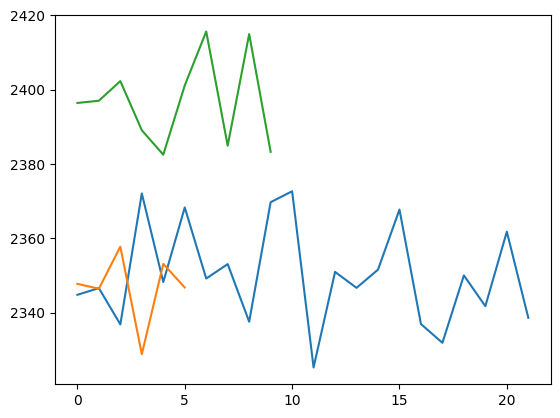

In [48]:
## TODO: Visualize the results. What do you see and why?
for loss in losses:
    plt.plot(loss[1])
    print(len(loss[1]))
    print(loss[1])

## Now lets try to explore the impact of the batch size

**Task:** Fix $num\_epochs = 150$ and $lr = 0.001$ and try to change the batch size using values $[2, 4, 32, 128, 1024]$ for the batch size.
* What impact the batch size have? Why?

In [49]:
num_epochs = 150
lr = 0.001
## TODO: Train with different batch sizes

batch_sizes=[2,4,32,128,1024]
epochloss_per_batchsize = []

# same as SDG but train_dataloader differs in size each iteration 
for batch_size in batch_sizes:
    train_dataloader = DataLoader(conductor_train, batch_size, shuffle=True)
    losses=[]
    for epoch in range(num_epochs):
        epoch_loss = 0.0
        for x_batch, target in train_dataloader:
            x_batch = x_batch.to(device)
            target = target.unsqueeze(1).to(device)
            optimizer.zero_grad()
            pred = model(x_batch)
            loss = loss_function(pred, target)
            epoch_loss += loss.item()
            loss.backward()
            # step führt die parameterberechnung durch
            optimizer.step()

        epoch_loss /= len(train_dataloader)
        losses.append(epoch_loss)
    epochloss_per_batchsize.append([losses, batch_size])
    print(f"Batchsize:{batch_size} , losses: {losses}")

KeyboardInterrupt: 

ValueError: x and y must have same first dimension, but have shapes (150,) and (1,)

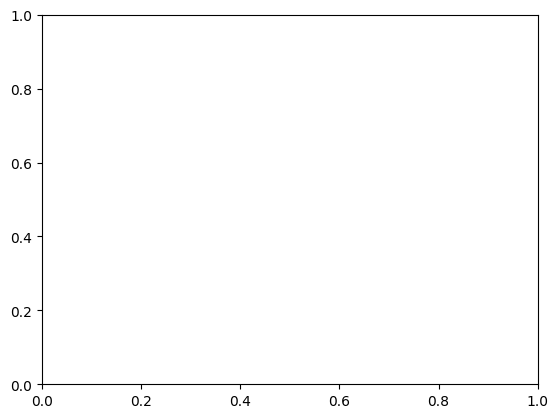

In [ ]:
## TODO: Visualize the differences 
for loss, batch_size in epochloss_per_batchsize:
    epochs_range = range(epochs)
    plt.plot(loss, batch_size, marker="o", linestyle="-", label="batchsize {batch_size}") 
plt.legend()
plt.xlabel("batchsize")
plt.ylabel("Loss")
plt.title("Batchsize vs Loss")
plt.show()